In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [482]:
data2=pd.read_csv('/content/train_ctrUa4K.csv')

In [483]:
data1=pd.read_csv('/content/test_lAUu6dG.csv')

In [484]:
train=data2.copy()

In [485]:
test=data1.copy()

In [486]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [487]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [488]:
train.shape

(614, 13)

In [489]:
test.shape

(367, 12)

In [490]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [491]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Checking Relationship

In [492]:
x = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

<Axes: >

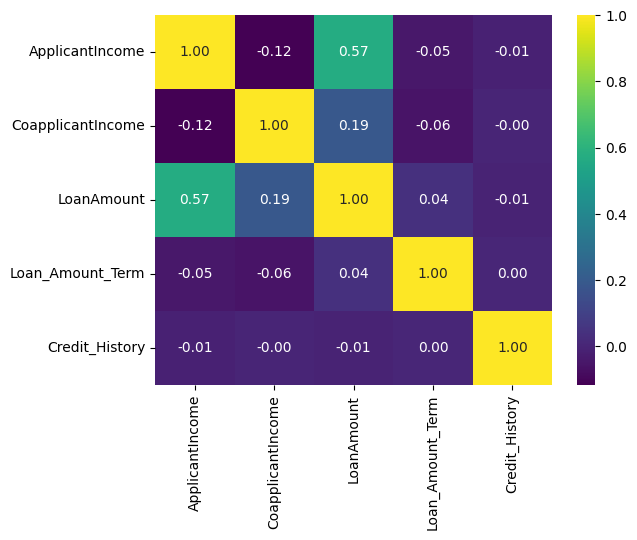

In [493]:
sns.heatmap(x.corr(),cmap='viridis', annot=True, fmt='.2f')

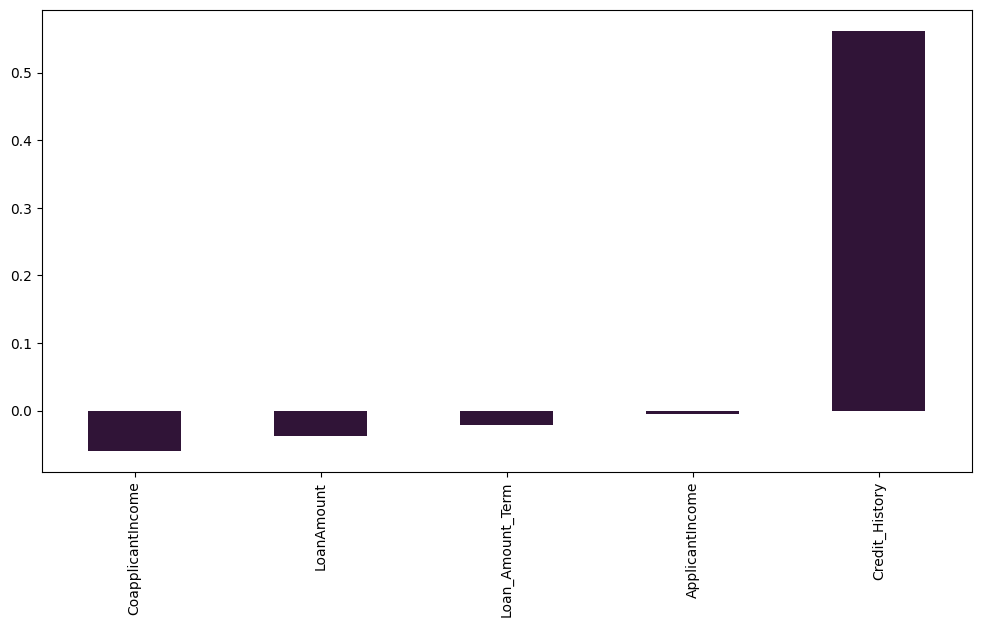

In [494]:
numeric_train = train.select_dtypes(include=['number'])
numeric_train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})
plt.figure(figsize = (12,6))
numeric_train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted')
#x.corr()['Loan_Status'][:-1].sort_values().plot(kind='bar')
plt.show()

#Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Property_Area'>

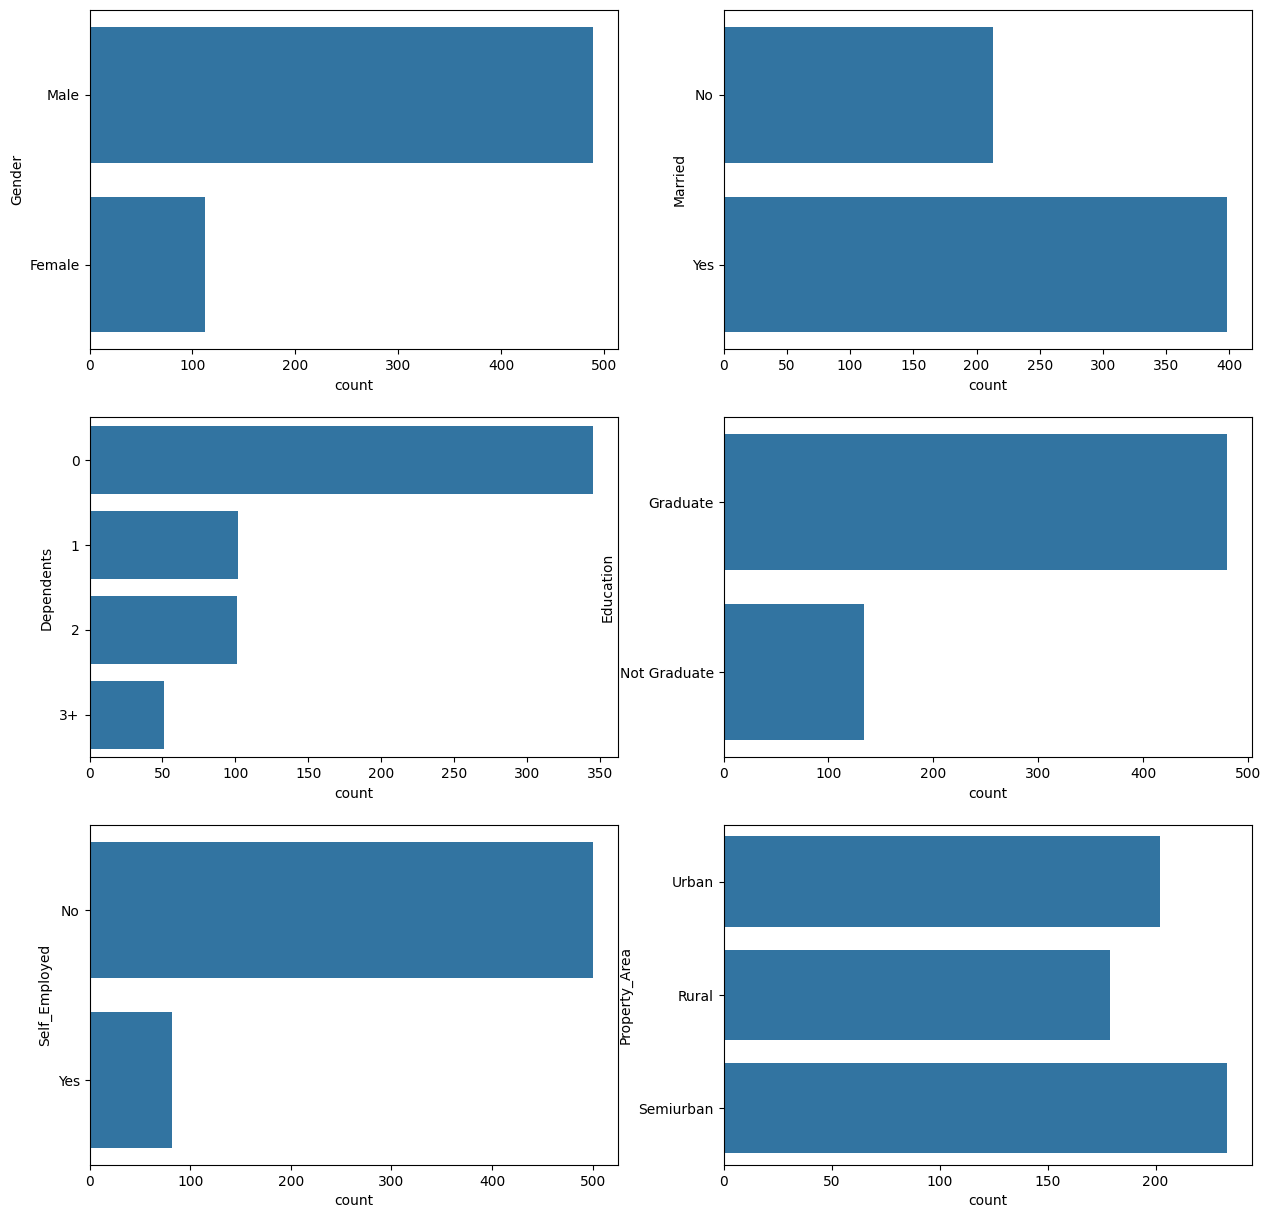

In [495]:
fig,ax = plt.subplots(3,2,figsize=(15,15))

sns.countplot(train['Gender'],ax=ax[0,0])
sns.countplot(train['Married'],ax=ax[0,1])
sns.countplot(train['Dependents'],ax=ax[1,0])
sns.countplot(train['Education'],ax=ax[1,1])
sns.countplot(train['Self_Employed'],ax=ax[2,0])
sns.countplot(train['Property_Area'],ax=ax[2,1])

# Missing Value Handling

In [496]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [497]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [498]:
train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [499]:
test['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [500]:
train['Gender'] = train['Gender'].fillna('Male')
test['Gender'] = test['Gender'].fillna('Male')

In [501]:
train['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [502]:
train['Married'] = train['Married'].fillna('Yes')

In [503]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [504]:
test['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [505]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])

In [506]:
train['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [507]:
test['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [508]:
train['Self_Employed'] = train['Self_Employed'].fillna('No')
test['Self_Employed'] = test['Self_Employed'].fillna('No')

<Axes: xlabel='LoanAmount', ylabel='Count'>

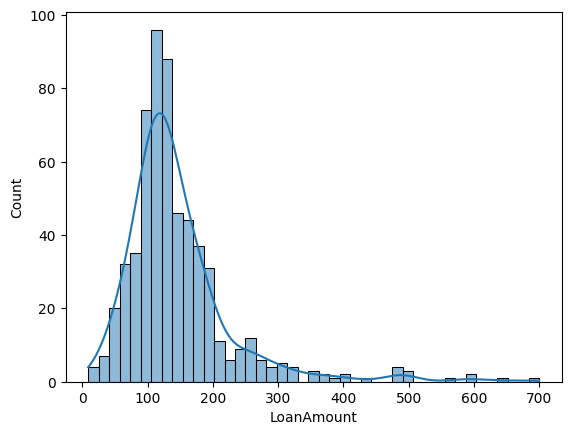

In [509]:
sns.histplot(train['LoanAmount'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

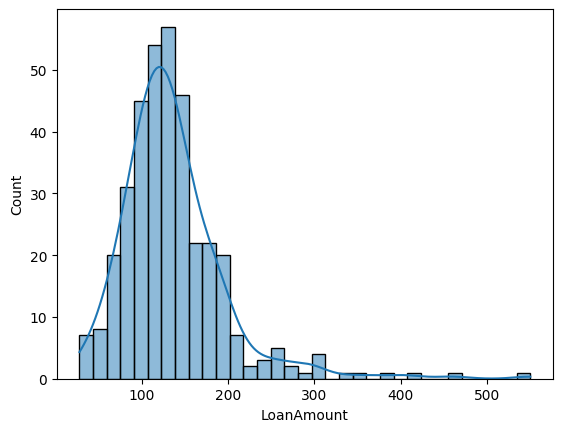

In [510]:
sns.histplot(test['LoanAmount'],kde=True)

In [511]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [512]:
train['Loan_Amount_Term'].nunique()

10

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

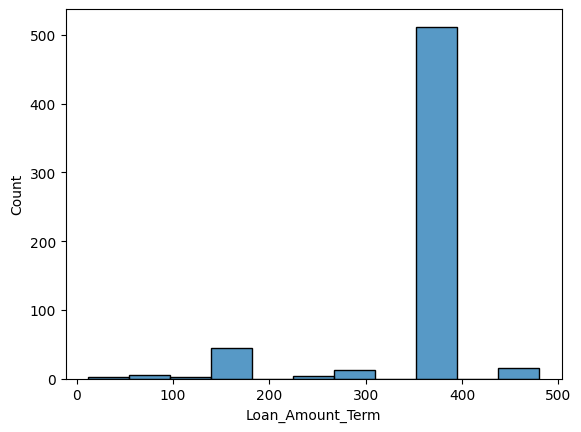

In [513]:
sns.histplot(train['Loan_Amount_Term'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

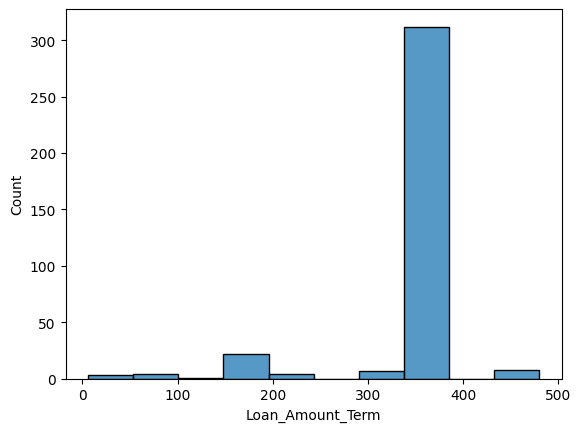

In [514]:
sns.histplot(test['Loan_Amount_Term'])

In [515]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

In [516]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [517]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [518]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [519]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Changing Datatypes

In [520]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

In [521]:
train['Loan_ID'].dtype

dtype('O')

In [522]:
train['Loan_ID']

0      1002
1      1003
2      1005
3      1006
4      1008
       ... 
609    2978
610    2979
611    2983
612    2984
613    2990
Name: Loan_ID, Length: 614, dtype: object

In [523]:
train['Loan_ID'] = train['Loan_ID'].astype('int64')
test['Loan_ID'] = test['Loan_ID'].astype('int64')

In [524]:
train['Loan_ID'].dtype

dtype('int64')

In [525]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [526]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

In [527]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})


In [528]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})


In [529]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [530]:
train = pd.get_dummies(train, columns=['Property_Area'],dtype=int)
test = pd.get_dummies(test, columns=['Property_Area'],dtype=int)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1002,1,0,0,1,0,5849,0.0,128.0,360,1.0,Y,0,0,1
1,1003,1,1,1,1,0,4583,1508.0,128.0,360,1.0,N,1,0,0
2,1005,1,1,0,1,1,3000,0.0,66.0,360,1.0,Y,0,0,1
3,1006,1,1,0,0,0,2583,2358.0,120.0,360,1.0,Y,0,0,1
4,1008,1,0,0,1,0,6000,0.0,141.0,360,1.0,Y,0,0,1


In [531]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1015,1,1,0,1,0,5720,0,110.0,360,1.0,0,0,1
1,1022,1,1,1,1,0,3076,1500,126.0,360,1.0,0,0,1
2,1031,1,1,2,1,0,5000,1800,208.0,360,1.0,0,0,1
3,1035,1,1,2,1,0,2340,2546,100.0,360,1.0,0,0,1
4,1051,1,0,0,0,0,3276,0,78.0,360,1.0,0,0,1


# Feature Scaling

In [532]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [533]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    int64  
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    int64  
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    object 
 12  Property_Area_Rural      614 non-null    int64  
 13  Property_Area_Semiurban  614 non-null    int64  
 14  Property_Area_Urban      6

In [534]:
X=train.drop(columns=['Loan_Status'])
y=train['Loan_Status']
X_test=test

In [535]:
X_train = scaler.fit_transform(X_train)


# Splitting data for training and validation

In [536]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=32)

# Model Building

In [537]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [538]:
models=[[LogisticRegression(),'LogisticRegression'],
        [KNeighborsClassifier(),'KNeighborsClassifier'],
        [RandomForestClassifier(),'RandomForestClassifier'],
        [DecisionTreeClassifier(),'DecisionTreeClassifier'],
        [SVC(),'SVC']]

In [539]:
for model,name in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_val)
  print(f'Accuracy of {name} is   {accuracy_score(y_val,y_pred)}\n')

Accuracy of LogisticRegression is   0.7967479674796748

Accuracy of KNeighborsClassifier is   0.6016260162601627

Accuracy of RandomForestClassifier is   0.7886178861788617

Accuracy of DecisionTreeClassifier is   0.6910569105691057

Accuracy of SVC is   0.6585365853658537



***Here Iam selecting Logistic Regression and Random Forest Classifier for tunning as they provides better accuracy ***

In [540]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l2'],
            'solver' : [ 'saga','newton-cg','liblinear','newton-cholesky'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    }, 'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    }
}

In [541]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train,y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [542]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.814612,"LogisticRegression(C=0.7, max_iter=1500, solve..."
1,RandomForestClassifier,0.814612,"(DecisionTreeClassifier(max_depth=5, max_featu..."


In [543]:
final['estimator'].iloc[0]

LogisticRegression(C=0.7, max_iter=1500, solver='newton-cholesky')

In [544]:
final['estimator'].iloc[1]

RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=4,
                       n_estimators=1000)

In [545]:
classifier1 = RandomForestClassifier(max_depth=7, n_estimators=2100)
classifier1.fit(X_train, y_train)
y_pred1= classifier1.predict(X_val)
print(f'Accuracy is {accuracy_score(y_val,y_pred1)}\n')

Accuracy is 0.8048780487804879



In [546]:
classifier = LogisticRegression(C=0.7, max_iter=1500, solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
print(f'Accuracy is {accuracy_score(y_val,y_pred)}\n')

Accuracy is 0.7967479674796748



Consider LogisticRegression for predition

# final submission

In [548]:
pred = classifier1.predict(X_test)

In [551]:
test1=pd.read_csv('/content/test_lAUu6dG.csv')
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [552]:
sample['Loan_ID'] = test1['Loan_ID']
sample['Loan_Status'] = pred

In [556]:
sample.to_csv('sample_submission.csv', index=False)